In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cp "/content/drive/My Drive/Histopathology data/smalldata.zip" "smalldata.zip"

In [3]:
!unzip -q smalldata.zip

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
with open('smalldata/files_list.txt', 'r') as fp:
    files = fp.read().splitlines()
classes_str = [file.split('/')[0] for file in files]
classes_str, classes = np.unique(classes_str, return_inverse=True)
print(classes_str)
train_files, test_files, train_classes, test_classes = train_test_split(files, classes, train_size=0.7, test_size=0.3, stratify=classes)

['NORM' 'TUM']


In [5]:
import matplotlib.pyplot as plt
import cv2, os 
import numpy as np
dir_images = "smalldata/"
train_imgs=[]
for f in train_files:
  s=dir_images+f
  train_imgs.append(s)
test_imgs=[]
for f in test_files:
  s=dir_images+f
  test_imgs.append(s)

In [6]:
print(len(train_files))
print(len(train_imgs))
print(len(test_files))
print(len(test_imgs))

2240
2240
960
960


In [7]:
pip install mahotas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.7 MB 15.7 MB/s 


In [8]:
import cv2
import numpy as np
import os
import glob
import mahotas as mt
from sklearn.svm import LinearSVC


def extract_features(image):
        # calculate the haralick texture features for 4 types of adjacency
        textures = mt.features.haralick(image)

        # find the mean of the features
        ht_mean = textures.mean(axis=0)
        return ht_mean

In [9]:
import pandas as pd


hist_list=[]
labels=[]
i=0
for imgnm in train_imgs:
    
    i+=1
    if i%500==0:
      print(i)
    image = plt.imread(imgnm)
    
    ht_mean = extract_features(image)
    
    
    hist_list.append(ht_mean)
    
hist=np.array(hist_list)
print(np.shape(hist))  

df = pd.DataFrame(hist)  

500
1000
1500
2000
(2240, 13)


In [10]:
hist_list=[]
labels=[]
i=0
for imgnm in test_imgs:
    
    i+=1
    if i%500==0:
      print(i)
    image = plt.imread(imgnm)
    
    ht_mean = extract_features(image)
    
    
    hist_list.append(ht_mean)
    
hist=np.array(hist_list)
print(np.shape(hist))  

df1 = pd.DataFrame(hist) 

500
(960, 13)


In [11]:
Y=[]
for c in train_classes:
  Y.append(c)
Y=np.array(Y)

y=[]
for c in test_classes:
  y.append(c)
y=np.array(y)



In [12]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(df, Y)

SVC(kernel='linear')

In [13]:
y_pred = clf.predict(df1)

In [14]:
from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(y, y_pred)

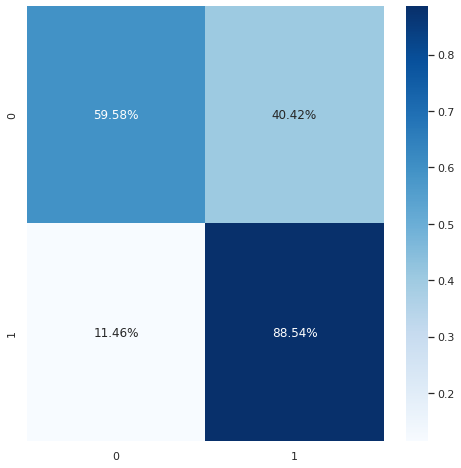

In [15]:
import seaborn as sns
sns.set(rc={"figure.figsize":(8, 8)})
sns.heatmap(cf_matrix/np.sum(cf_matrix,axis=1), annot=True, fmt='.2%', cmap='Blues')

In [ ]:
from sklearn.metrics import accuracy_score
acc_score=accuracy_score(y, y_pred)
print(acc_score)

0.7520833333333333
